<center>

**CIFRADOS POR SUSTITUCIÓN**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>

# **➿Cifrado Afín〰️**

<center>

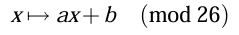

</center>

<div align="justify">

El cifrado afín es una transformación monoalfabética definida sobre un anillo de enteros módulo $n$ (habitualmente $n=26$ para el alfabeto latino A–Z).  

---

**Espacio de trabajo**

Sea  $A=\{a_0,a_1,\dots,a_{n-1}\}$ el alfabeto ordenado.  Definimos la biyección índice–símbolo

$
\begin{aligned}
\varphi:A &\longrightarrow \Bbb Z_n \\
a_i &\longmapsto i
\end{aligned}
$

de modo que cada símbolo se identifica con su clase de congruencia $i\pmod n$.

---

**Clave**

Una clave afín es el par ordenado  

$
k=(a,b)\in K,\qquad K = U(n)\times \Bbb Z_n,
$

donde  
$U(n)=\{x\in\Bbb Z_n\mid\gcd(x,n)=1\}$ es el grupo de unidades módulo $n$. Se requiere $\gcd(a,n)=1$ para que exista inverso multiplicativo.

---

**Función de cifrado**

La función de cifrado $E_k:\Bbb Z_n\to\Bbb Z_n$ está dada por  

$$
E_k(x)=a\,x+b \pmod n.
$$

---

**Función de descifrado**

Para invertir $E_k$ se necesita $a^{-1}\in U(n)$ tal que  

$
a\,a^{-1}\equiv 1\pmod n.
$

El inverso de $a$ se obtiene mediante el algoritmo extendido de Euclides.  
El descifrado $D_k:\Bbb Z_n\to\Bbb Z_n$ es  

$$
D_k(y)=a^{-1}\,(y-b)\pmod n,
$$

y satisface $D_k\bigl(E_k(x)\bigr)=x$ para todo $x\in\Bbb Z_n$.

---

**Estructura algebraica del conjunto de claves**

$K$ con la ley  $(a_1,b_1)\circ(a_2,b_2)=\bigl(a_1a_2,\;a_1b_2+b_1\bigr)\pmod n$

es el grupo afín unidimensional.  

$$
\mathrm{GA}(1,n)\cong U(n)\ltimes \Bbb Z_n,
$$

de orden $|K|=n\,\varphi(n)$, donde $\varphi$ es la función totiente de Euler.  
Para $n=26$ se tiene $\varphi(26)=12$ y por tanto $|K|=26\cdot 12=312$ claves posibles.

---

**Propiedades fundamentales**
* $E_k$ es una permutación de $\Bbb Z_n$ $\iff$ $\gcd(a,n)=1$.  
* $E_k$ es una aplicación lineal afín: composición de una homotecia ($a$) y una traslación ($b$).  
* El conjunto $\{E_k\mid k\in K\}$ es un subgrupo del grupo simétrico $S_n$.  
* Para $n=p$ primo, $U(n)$ es cíclico de orden $p-1$ y $\mathrm{GA}(1,p)$ tiene orden $p(p-1)$.  
* El cifrado afín degenera en el cifrado de César cuando $a=1$.

---

**Complejidad de ataque por fuerza bruta**

La búsqueda exhaustiva exige evaluar $|K|=n\varphi(n)$ claves,  
lo que para $n=26$ significa $312$ ensayos, cifra trivialmente abordable.  
Consecuentemente el cifrado afín es inseguro frente a:

1. Ataque de clave pequeña (fuerza bruta).  
2. Ataque de texto claro conocido verificando dos pares $(x_1,y_1),(x_2,y_2)$ y resolviendo

$$
\begin{cases}
a\,x_1+b\equiv y_1\pmod n\\
a\,x_2+b\equiv y_2\pmod n
\end{cases}
$$

para $(a,b)$ en $\Bbb Z_n$ (sistema lineal con solución única si $x_1\not\equiv x_2\pmod n$).  
3. Análisis de frecuencias (mantiene proporción 1 : 1 entre letras).

---

</div>

<center>

**📥Importaciones📦**

In [1]:

!pip install -q ipywidgets
import ipywidgets as wd
from IPython.display import display
import string
from math import gcd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


**👨‍💻Implementación👩‍💻**

In [2]:

ALPHABET = string.ascii_uppercase
MOD = 26
VALID_A = [a for a in range(1, MOD) if gcd(a, MOD) == 1]


def mod_inverse(a: int, m: int) -> int:

    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    raise ValueError(f"No existe inverso modular para a={a} mod {m}")

def affine_encrypt(text: str, a: int, b: int) -> str:

    result = []
    for char in text:
        if char.upper() in ALPHABET:
            x = ALPHABET.index(char.upper())
            y = (a * x + b) % MOD
            cipher_char = ALPHABET[y]
            result.append(cipher_char if char.isupper() else cipher_char.lower())
        else:
            result.append(char)
    return "".join(result)

def affine_decrypt(cipher: str, a: int, b: int) -> str:

    result = []
    a_inv = mod_inverse(a, MOD)
    for char in cipher:
        if char.upper() in ALPHABET:
            y = ALPHABET.index(char.upper())
            x = (a_inv * (y - b)) % MOD
            plain_char = ALPHABET[x]
            result.append(plain_char if char.isupper() else plain_char.lower())
        else:
            result.append(char)
    return "".join(result)

**👨‍💻Implementación👩‍💻**

In [3]:

text_input = wd.Textarea(value="AFFINE CIPHER",description="Texto:",layout=wd.Layout(width="100%", height="80px"))
dropdown_a = wd.Dropdown(options=VALID_A,value=5,description="a:")
slider_b = wd.IntSlider(value=8,min=0,max=25,step=1,description="b:")
mode = wd.ToggleButtons(options=[("Cifrar", "enc"), ("Descifrar", "dec")],value="enc",description="Modo:")
output = wd.Output(layout=wd.Layout(border="1px solid gray", padding="6px"))

def update_output(*_):
    output.clear_output()
    with output:
        try:
            a = dropdown_a.value
            b = slider_b.value
            text = text_input.value
            if mode.value == "enc":
                res = affine_encrypt(text, a, b)
                print("🔐 Texto cifrado:")
                print(res)
            else:
                res = affine_decrypt(text, a, b)
                print("🔓 Texto descifrado:")
                print(res)
        except Exception as e:
            print("❌ Error:", e)

for w in (text_input, dropdown_a, slider_b, mode):
    w.observe(update_output, names="value")

**👨‍💻Implementación👩‍💻**

In [4]:

display(wd.VBox([wd.HTML("<h3 style='margin:0'>Cifrado Afín (Affine Cipher)</h3>"),text_input, dropdown_a, slider_b, mode, output]))
update_output()

<center>